# Análisis y Extracción de Habilidades Técnicas en Ofertas Laborales

Este cuaderno implementa un flujo estructurado para analizar y modelar datos de habilidades técnicas extraídas de ofertas laborales.

## 1. Importar bibliotecas necesarias
Importa todas las bibliotecas requeridas para el análisis y modelado de datos.

In [1]:
# Importar bibliotecas principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from collections import Counter
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Cargar y explorar los datos
Carga los datos desde los archivos *_Merged.csv y muestra información básica.

In [2]:
# Buscar archivos *_Merged.csv y cargar textos
ruta_base = 'todas_las_plataformas'
columnas_texto = ['skills', 'description', 'description_final', 'initial_skills', 'EURACE_skills']
corpus_carreras = {}
for subcarpeta in os.listdir(ruta_base):
    ruta_subcarpeta = os.path.join(ruta_base, subcarpeta)
    archivo_objetivo = os.path.join(ruta_subcarpeta, f'{subcarpeta}_Merged.csv')
    if os.path.isfile(archivo_objetivo):
        try:
            df = pd.read_csv(archivo_objetivo, dtype=str)
        except Exception as e:
            print(f'Error leyendo {archivo_objetivo}: {e}')
            continue
        textos = []
        for col in columnas_texto:
            if col in df.columns:
                textos.extend(df[col].dropna().tolist())
        corpus_carreras[subcarpeta] = ' '.join(textos)
# Mostrar información básica
df_ejemplo = pd.DataFrame({'carrera': list(corpus_carreras.keys()), 'texto': list(corpus_carreras.values())})
#print(df_ejemplo.head())
#print(f'Total carreras: {len(corpus_carreras)}')

In [3]:
df_ejemplo

,carrera,texto
0,Administración_de_Empresas,"Servicio al cliente, Ventas, Gestión de efecti..."
1,Agroindustria,Cualquier desviación debe comunicarse al super...
2,Ciencia_de_Datos,Más de 3 años de experiencia en desarrollo de ...
3,Computación,"En general, estamos buscando un miembro del eq..."
4,Economía,"Sobresalir, Inteligencia de negocios, Power Bi..."
5,Electricidad,2 anos de experiencia minima como montador (pr...
6,Electrónica_y_Automatización,El candidato ideal tendrá experiencia en trata...
7,Física,Licenciatura y mínimo 9 años de experiencia re...
8,Geología,Grado avanzado (maestría o doctorado) en geolo...
9,Ingeniería_Ambiental,"Una licenciatura en un campo científico, de in..."


## 3. Limpieza de datos
Preprocesamiento del texto: conversión a minúsculas, eliminación de signos de puntuación y stopwords.

In [4]:
# Descargar stopwords en español
nltk.download('stopwords')
from nltk.corpus import stopwords

# Crear conjunto de stopwords en español e inglés
stopwords_es = set(stopwords.words('spanish'))
stopwords_en = set(ENGLISH_STOP_WORDS)
stopwords_combined = stopwords_es.union(stopwords_en)

print(f"Total de stopwords en español: {len(stopwords_es)}")
print(f"Total de stopwords en inglés: {len(stopwords_en)}")
print(f"Total de stopwords combinadas: {len(stopwords_combined)}")

Total de stopwords en español: 313
Total de stopwords en inglés: 318
Total de stopwords combinadas: 623


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def limpiar_texto(texto):
    """
    Limpia el texto realizando las siguientes operaciones:
    1. Convierte a minúsculas
    2. Elimina signos de puntuación
    3. Elimina stopwords (español e inglés)
    
    Args:
        texto (str): Texto a limpiar
    
    Returns:
        str: Texto limpio
    """
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar signos de puntuación y caracteres especiales (mantener solo letras, números y espacios)
    texto = re.sub(r'[^\w\s]', ' ', texto)
    
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    
    # Tokenizar y eliminar stopwords
    palabras = texto.split()
    palabras_limpias = [palabra for palabra in palabras if palabra not in stopwords_combined and len(palabra) > 2]
    
    # Unir palabras limpias
    return ' '.join(palabras_limpias)

In [6]:
# Verificar que corpus_carreras tiene datos
print(f"Número de carreras en corpus_carreras: {len(corpus_carreras)}")
if len(corpus_carreras) > 0:
    print(f"Primeras 5 carreras: {list(corpus_carreras.keys())[:5]}")
    carrera_ejemplo = list(corpus_carreras.keys())[0]
    print(f"\nEjemplo - {carrera_ejemplo}: {len(corpus_carreras[carrera_ejemplo].split())} palabras")
else:
    print("⚠️ ADVERTENCIA: corpus_carreras está vacío!")
    print("Ejecuta primero la celda 5 (Cargar y explorar los datos)")

Número de carreras en corpus_carreras: 24
Primeras 5 carreras: ['Administración_de_Empresas', 'Agroindustria', 'Ciencia_de_Datos', 'Computación', 'Economía']

Ejemplo - Administración_de_Empresas: 578812 palabras


In [7]:
# Aplicar la limpieza a cada corpus de carrera
corpus_carreras_limpio = {}

for carrera, texto in corpus_carreras.items():
    texto_limpio = limpiar_texto(texto)
    corpus_carreras_limpio[carrera] = texto_limpio
    print(f"Procesada: {carrera} - Palabras después de limpieza: {len(texto_limpio.split())}")

print(f"\nTotal de carreras procesadas: {len(corpus_carreras_limpio)}")

Procesada: Administración_de_Empresas - Palabras después de limpieza: 338056
Procesada: Agroindustria - Palabras después de limpieza: 130145
Procesada: Ciencia_de_Datos - Palabras después de limpieza: 302355
Procesada: Ciencia_de_Datos - Palabras después de limpieza: 302355
Procesada: Computación - Palabras después de limpieza: 380982
Procesada: Economía - Palabras después de limpieza: 167659
Procesada: Computación - Palabras después de limpieza: 380982
Procesada: Economía - Palabras después de limpieza: 167659
Procesada: Electricidad - Palabras después de limpieza: 220442
Procesada: Electricidad - Palabras después de limpieza: 220442
Procesada: Electrónica_y_Automatización - Palabras después de limpieza: 339185
Procesada: Física - Palabras después de limpieza: 139095
Procesada: Geología - Palabras después de limpieza: 70363
Procesada: Electrónica_y_Automatización - Palabras después de limpieza: 339185
Procesada: Física - Palabras después de limpieza: 139095
Procesada: Geología - Palab

In [8]:
# Crear DataFrame con los textos limpios para visualización
df_limpio = pd.DataFrame({
    'carrera': list(corpus_carreras_limpio.keys()),
    'texto_limpio': list(corpus_carreras_limpio.values())
})

# Agregar columna con el número de palabras
df_limpio['num_palabras'] = df_limpio['texto_limpio'].apply(lambda x: len(x.split()))

# Mostrar primeros registros y estadísticas
print("Primeros registros del corpus limpio:")
print(df_limpio[['carrera', 'num_palabras']].head(10))

Primeros registros del corpus limpio:
                        carrera  num_palabras
0    Administración_de_Empresas        338056
1                 Agroindustria        130145
2              Ciencia_de_Datos        302355
3                   Computación        380982
4                      Economía        167659
5                  Electricidad        220442
6  Electrónica_y_Automatización        339185
7                        Física        139095
8                      Geología         70363
9          Ingeniería_Ambiental        225091


In [9]:
# Ejemplo de comparación antes y después de la limpieza
carrera_ejemplo = list(corpus_carreras.keys())[0]
print(f"=== Ejemplo de limpieza para: {carrera_ejemplo} ===\n")
print(f"Texto original (primeros 500 caracteres):")
print(corpus_carreras[carrera_ejemplo][:500])
print(f"\n\nTexto limpio (primeros 500 caracteres):")
print(corpus_carreras_limpio[carrera_ejemplo][:500])
print(f"\n\nPalabras originales: {len(corpus_carreras[carrera_ejemplo].split())}")
print(f"Palabras después de limpieza: {len(corpus_carreras_limpio[carrera_ejemplo].split())}")

=== Ejemplo de limpieza para: Administración_de_Empresas ===

Texto original (primeros 500 caracteres):
Servicio al cliente, Ventas, Gestión de efectivo, Documentación, Supervisión del equipo Remediar itsm, Helix BMC, Servidor SQL, Kubernetes, Integración del sistema, Inglés Microsoft 365, Tendencia micro, Acronis, Servidor de Windows, Cortafuegos, Azur, Powershell, Intento Iniciativa, Proactividad, Habilidades de comunicación, Habilidades interpersonales, Orientación al cliente, Habilidades analíticas, Resolución de problemas, Trabajo en equipo, Autonomía, Sistemas operativos de Windows, Administ


Texto limpio (primeros 500 caracteres):
servicio cliente ventas gestión efectivo documentación supervisión equipo remediar itsm helix bmc servidor sql kubernetes integración sistema inglés microsoft tendencia micro acronis servidor windows cortafuegos azur powershell intento iniciativa proactividad habilidades comunicación habilidades interpersonales orientación cliente habilidades analític

## 4. Análisis de Frecuencia de Términos
Genera matriz término-frecuencia para identificar las habilidades técnicas más relevantes por carrera.

In [10]:
# Calcular la frecuencia de términos para cada carrera
from collections import Counter

frecuencia_por_carrera = {}

for carrera, texto in corpus_carreras_limpio.items():
    # Contar la frecuencia de cada palabra
    palabras = texto.split()
    contador = Counter(palabras)
    frecuencia_por_carrera[carrera] = contador

print(f"Frecuencias calculadas para {len(frecuencia_por_carrera)} carreras")

Frecuencias calculadas para 24 carreras


In [11]:
# Crear deny list: términos genéricos que NO son habilidades técnicas
deny_list = {
    # Términos HTML/Web genéricos
    'nbsp', 'html', 'css', 'description', 'title', 'name', 'type', 'value', 'class', 'div',
    'descripción', 'desc', 'summary', 'resumen',
    
    # Términos laborales genéricos
    'trabajo', 'job', 'position', 'career', 'employment', 'vacancy', 'offer', 'oportunidad',
    'puesto', 'plaza', 'vacante', 'oferta', 'empleo', 'empleado', 'candidato', 'postulante',
    'trabajar', 'trabajando', 'trabajadores', 'worker', 'workers',
    
    # Términos de equipo/organización
    'equipo', 'equipos', 'team', 'empresa', 'company', 'organization', 'department', 'área', 'compañía',
    'cliente', 'customer', 'client', 'colaboración', 'collaboration', 'clientes', 'customers',
    
    # Términos de experiencia/habilidades blandas
    'experiencia', 'experience', 'conocimiento', 'knowledge', 'habilidad', 'skill', 'skills',
    'competencia', 'competency', 'capacidad', 'ability', 'aprendizaje', 'learning',
    'comunicación', 'communication', 'liderazgo', 'leadership', 'habilidades',
    
    # Términos de tiempo
    'años', 'year', 'years', 'meses', 'months', 'días', 'days', 'tiempo', 'time',
    
    # Términos de gestión genéricos
    'gestión', 'management', 'proyecto', 'project', 'proyectos', 'projects', 
    'development', 'implementación', 'implementation', 'manager', 'gerente',
    
    # Términos de procesos genéricos
    'proceso', 'process', 'procesos', 'processes', 'actividad', 'activity', 'actividades',
    'tarea', 'task', 'tareas', 'tasks', 'función', 'function', 'responsabilidad',
    
    # Términos educativos genéricos
    'título', 'degree', 'educación', 'education', 'universidad', 'university', 'estudios',
    
    # Términos relacionales/conectores que pasaron el filtro
    'relacionadas', 'related', 'según', 'required', 'necesario', 'deseable', 'preferible',
    'buscando', 'seeking', 'looking', 'search', 'buscar', 'find',
    
    # Términos de calidad/rendimiento genéricos
    'calidad', 'quality', 'excelente', 'excellent', 'buena', 'good', 'óptimo', 'optimal',
    
    # Términos de ubicación
    'location', 'ubicación', 'remoto', 'remote', 'presencial', 'onsite',
    
    # Términos de servicios genéricos
    'servicio', 'service', 'servicios', 'services', 'atención', 'attention',
    
    # Términos generales muy comunes
    'general', 'específico', 'specific', 'varios', 'various', 'todo', 'all',
    'personal', 'staff', 'administración', 'administration',
    
    # Profesiones no relacionadas con tecnología
    'chef', 'cocinero', 'cook', 'cocina', 'kitchen',
    
    # Verbos y acciones genéricas
    'garantizar', 'ensure', 'asegurar', 'mantener', 'maintain', 'apoyar', 'support',
    'ayudar', 'help', 'coordinar', 'coordinate', 'supervisar', 'supervise',
    
    # Términos de producción genéricos
    'producción', 'production', 'producto', 'product', 'productos', 'products',
    
    # Términos descriptivos
    'soluciones', 'solutions', 'problemas', 'problems', 'problema', 'problem',
    'modelos', 'models', 'modelo', 'model',
    
    # Otros términos genéricos
    'información', 'information', 'datos', 'data', 'requisitos', 'requirements',
    'beneficios', 'benefits', 'salario', 'salary', 'nivel', 'level',
    'profesional', 'professional', 'persona', 'person', 'personas', 'people',
    'uso', 'use', 'realizar', 'perform', 'hacer', 'make', 'crear', 'create',
    'work', 'working', 'técnicas', 'techniques', 'técnica', 'technique', 
    'assistant','asistente', 'debe', 'responsabilidades', 'responsable', 
    'ambient', 'ser', 'miembro', 'parte','controller', 'role', 'des',
    'oportunidades', 'líder', 'unirse', 'entorno', 'environmnet', 'mercado',
    'clientes', 'customers', 'ventas', 'empleados', 'empleado', 'puede', 'capital',
    'planificación', 'conocimientos', 'chick', 'fil', 'fisica', 'físicas', 'requiere',
    'cumplimiento', 'usted', 'tener', 'mental', 'com', 'join', 'vida', 'und',
    'fitness', 'miembros', 'center', 'medio', 'manejo'
}

print(f"Deny list creada con {len(deny_list)} términos genéricos a filtrar")

Deny list creada con 262 términos genéricos a filtrar


In [12]:
# Crear ranking de Top 7 habilidades técnicas PURAS por carrera (aplicando deny list)
top_n = 7
rankings_carreras = {}

for carrera, contador in frecuencia_por_carrera.items():
    # Filtrar términos que están en la deny list
    contador_filtrado = {termino: freq for termino, freq in contador.items() 
                         if termino.lower() not in deny_list}
    
    # Obtener los 7 términos más frecuentes después del filtrado
    top_terminos = Counter(contador_filtrado).most_common(top_n)
    rankings_carreras[carrera] = top_terminos

# Mostrar el ranking para cada carrera
print("=" * 80)
print("RANKING DE TOP 7 HABILIDADES TÉCNICAS PURAS POR CARRERA")
print("(Filtradas palabras genéricas)")
print("=" * 80)

for carrera, ranking in rankings_carreras.items():
    print(f"\n📊 {carrera.replace('_', ' ').upper()}")
    print("-" * 80)
    for i, (termino, frecuencia) in enumerate(ranking, 1):
        print(f"  {i}. {termino:.<30} {frecuencia:>10,} veces")
    print()

RANKING DE TOP 7 HABILIDADES TÉCNICAS PURAS POR CARRERA
(Filtradas palabras genéricas)

📊 ADMINISTRACIÓN DE EMPRESAS
--------------------------------------------------------------------------------
  1. operaciones...................        702 veces
  2. empresas......................        666 veces
  3. oficina.......................        633 veces
  4. seguridad.....................        521 veces
  5. desarrollo....................        505 veces
  6. seguro........................        497 veces
  7. administrativo................        492 veces


📊 AGROINDUSTRIA
--------------------------------------------------------------------------------
  1. alimentos.....................        913 veces
  2. seguridad.....................        362 veces
  3. control.......................        357 veces
  4. cultivos......................        294 veces
  5. mantenimiento.................        268 veces
  6. limpieza......................        267 veces
  7. manera...

In [13]:
# Crear DataFrame consolidado con los rankings
data_ranking = []

for carrera, ranking in rankings_carreras.items():
    for posicion, (termino, frecuencia) in enumerate(ranking, 1):
        data_ranking.append({
            'Carrera': carrera.replace('_', ' '),
            'Posición': posicion,
            'Término': termino,
            'Frecuencia': frecuencia
        })

df_ranking = pd.DataFrame(data_ranking)

# Mostrar tabla resumen
#print("\n📋 TABLA RESUMEN - Top 7 por Carrera")
#print("=" * 80)
#print(df_ranking.head(21))  # Mostrar las primeras 3 carreras (21 filas)

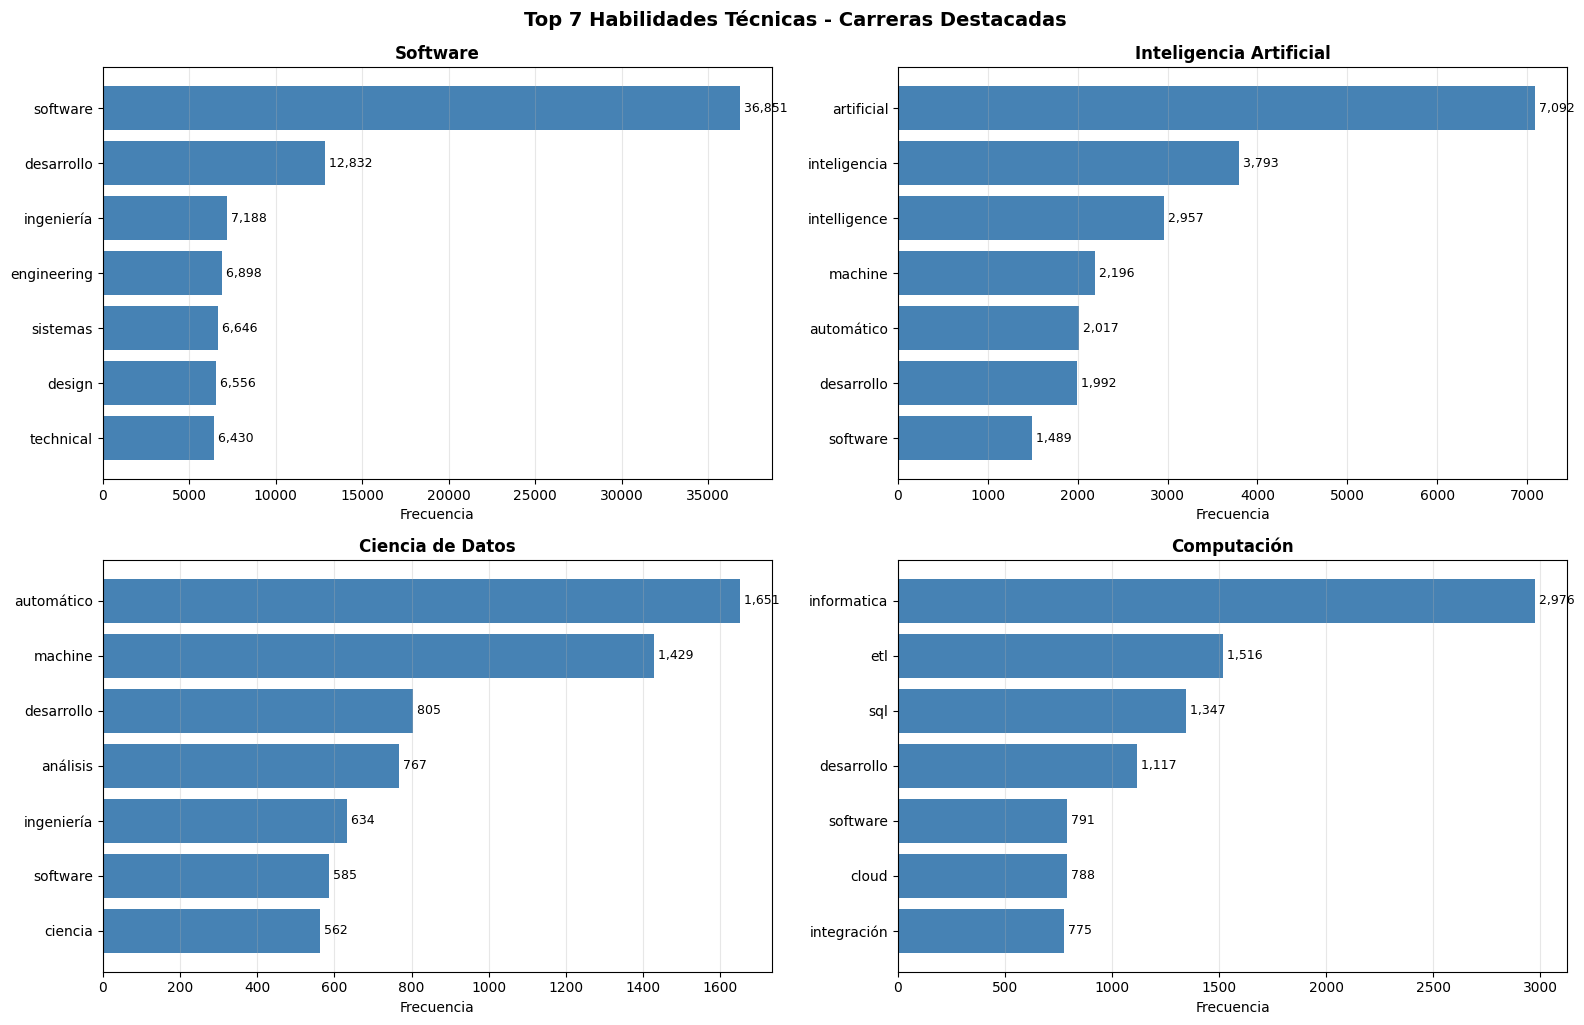

In [14]:
# Visualización: Gráfico de barras para algunas carreras seleccionadas
carreras_destacadas = ['Software', 'Inteligencia_Artificial', 'Ciencia_de_Datos', 'Computación']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, carrera in enumerate(carreras_destacadas):
    if carrera in rankings_carreras:
        terminos = [term for term, freq in rankings_carreras[carrera]]
        frecuencias = [freq for term, freq in rankings_carreras[carrera]]
        
        axes[idx].barh(terminos[::-1], frecuencias[::-1], color='steelblue')
        axes[idx].set_xlabel('Frecuencia', fontsize=10)
        axes[idx].set_title(f'{carrera.replace("_", " ")}', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)
        
        # Añadir valores en las barras
        for i, v in enumerate(frecuencias[::-1]):
            axes[idx].text(v, i, f' {v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.suptitle('Top 7 Habilidades Técnicas - Carreras Destacadas', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 4.5. Matriz Término-Documento Global
Crea una matriz que muestra la frecuencia de los top 6 términos de cada carrera en todos los documentos.

In [15]:
# Extraer los Top 6 términos únicos de cada carrera
top_n_global = 6
vocabulario_global = set()

# Recolectar todos los términos top de cada carrera
for carrera, ranking in rankings_carreras.items():
    for termino, freq in ranking[:top_n_global]:
        vocabulario_global.add(termino)

print(f"Vocabulario global creado con {len(vocabulario_global)} términos únicos")
print(f"Primeros 20 términos del vocabulario: {sorted(list(vocabulario_global))[:20]}")

Vocabulario global creado con 89 términos únicos
Primeros 20 términos del vocabulario: ['alimentos', 'ambiental', 'ambientales', 'ambiente', 'análisis', 'artificial', 'automatización', 'automático', 'business', 'básicas', 'centro', 'civil', 'cloud', 'construcción', 'consultant', 'consultor', 'control', 'controlador', 'cuisine', 'cultivos']


In [16]:
# Crear la matriz Término-Documento
# Filas: Términos del vocabulario global
# Columnas: Carreras (documentos)

matriz_td = {}

for termino in vocabulario_global:
    matriz_td[termino] = {}
    for carrera, contador in frecuencia_por_carrera.items():
        # Obtener la frecuencia del término en cada carrera
        # Si el término no existe, la frecuencia es 0
        matriz_td[termino][carrera] = contador.get(termino, 0)

# Convertir a DataFrame
df_matriz_td = pd.DataFrame(matriz_td).T  # Transponer para tener términos en filas
df_matriz_td = df_matriz_td.fillna(0).astype(int)

# Ordenar por la suma total de frecuencias (términos más presentes globalmente)
df_matriz_td['Total'] = df_matriz_td.sum(axis=1)
df_matriz_td = df_matriz_td.sort_values('Total', ascending=False)

print(f"Matriz Término-Documento creada: {df_matriz_td.shape}")
print(f"Dimensiones: {len(vocabulario_global)} términos × {len(frecuencia_por_carrera)} documentos (carreras)")
print(f"\nPrimeros 10 términos más frecuentes globalmente:")
#print(df_matriz_td.head(10))
df_matriz_td

Matriz Término-Documento creada: (89, 25)
Dimensiones: 89 términos × 24 documentos (carreras)

Primeros 10 términos más frecuentes globalmente:


,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones,Total
software,207,44,585,791,143,104,231,48,35,152,...,12,133,356,160,36,3463,36851,998,298,46601
desarrollo,505,205,805,1117,240,409,530,217,145,475,...,42,240,318,336,120,2905,12832,1168,641,27232
sistemas,410,142,553,733,104,1075,672,159,51,379,...,47,266,496,772,114,4106,6646,2215,964,21912
erp,36,14,6,31,56,5,33,9,0,10,...,2,102,19,4,8,19460,276,253,16,20384
ingeniería,201,84,634,415,174,407,429,96,83,736,...,47,289,279,443,133,592,7188,504,648,17683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
petróleo,7,0,0,2,1,11,9,0,0,12,...,0,4,2,25,878,10,13,5,22,1045
noise,0,0,0,0,0,3,12,7,0,765,...,0,22,6,6,4,4,17,7,2,897
economía,19,8,49,38,363,4,12,0,2,48,...,0,2,9,9,2,98,48,17,16,794
cultivos,0,294,1,0,1,4,0,0,0,0,...,0,0,0,15,9,25,5,0,0,374


In [17]:
# Análisis: ¿Qué términos tienen mayor presencia en múltiples carreras?
# Contar en cuántas carreras aparece cada término (frecuencia > 0)

df_matriz_td['Num_Carreras'] = (df_matriz_td.drop('Total', axis=1) > 0).sum(axis=1)

# Crear DataFrame de análisis
df_analisis = pd.DataFrame({
    'Término': df_matriz_td.index,
    'Frecuencia_Total': df_matriz_td['Total'],
    'Num_Carreras': df_matriz_td['Num_Carreras'],
    'Promedio_por_Carrera': (df_matriz_td['Total'] / df_matriz_td['Num_Carreras']).round(2)
})

print("\n" + "="*80)
print("ANÁLISIS DE PRESENCIA DE TÉRMINOS EN TODAS LAS CARRERAS")
print("="*80)
print("\nTop 15 términos con mayor frecuencia total:")
print(df_analisis.sort_values('Frecuencia_Total', ascending=False).head(15).to_string(index=False))


ANÁLISIS DE PRESENCIA DE TÉRMINOS EN TODAS LAS CARRERAS

Top 15 términos con mayor frecuencia total:
      Término  Frecuencia_Total  Num_Carreras  Promedio_por_Carrera
     software             46601            24               1941.71
   desarrollo             27232            24               1134.67
     sistemas             21912            24                913.00
          erp             20384            22                926.55
   ingeniería             17683            24                736.79
     business             14589            24                607.88
    seguridad             14473            24                603.04
mantenimiento             12980            24                540.83
 herramientas             12345            24                514.38
        cloud             12083            23                525.35
      técnico             11666            24                486.08
    ingeniero             11425            24                476.04
  engineering 

In [18]:
# Visualizar la matriz completa (sin la columna Total para mejor visualización)
df_viz = df_matriz_td.drop(['Total', 'Num_Carreras'], axis=1)

# Mostrar los top 20 términos en formato de tabla
print("\n" + "="*120)
print("MATRIZ TÉRMINO-DOCUMENTO: Top 20 términos × 24 carreras")
print("="*120)
print("\nNota: Valores representan la frecuencia del término en cada carrera")
print("-"*120)

# Seleccionar top 20 términos más frecuentes
top_20_terminos = df_matriz_td.nlargest(20, 'Total').index
df_top20 = df_viz.loc[top_20_terminos]

# Mostrar con formato
print(df_top20.to_string())

# Opción para guardar
# df_matriz_td.to_csv('matriz_termino_documento_global.csv', encoding='utf-8-sig')
# print("\n✅ Matriz guardada en 'matriz_termino_documento_global.csv'")


MATRIZ TÉRMINO-DOCUMENTO: Top 20 términos × 24 carreras

Nota: Valores representan la frecuencia del término en cada carrera
------------------------------------------------------------------------------------------------------------------------
               Administración_de_Empresas  Agroindustria  Ciencia_de_Datos  Computación  Economía  Electricidad  Electrónica_y_Automatización  Física  Geología  Ingeniería_Ambiental  Ingeniería_Civil  Ingeniería_de_la_Producción  Ingeniería_Química  Inteligencia_Artificial  Matemática  Matemática_Aplicada  Materiales  Mecatrónica  Mecánica  Petróleos  Sistemas_de_Información  Software  Tecnologías_de_la_Información  Telecomunicaciones
software                              207             44               585          791       143           104                           231      48        35                   152               280                          118                  61                     1489           6                   12        

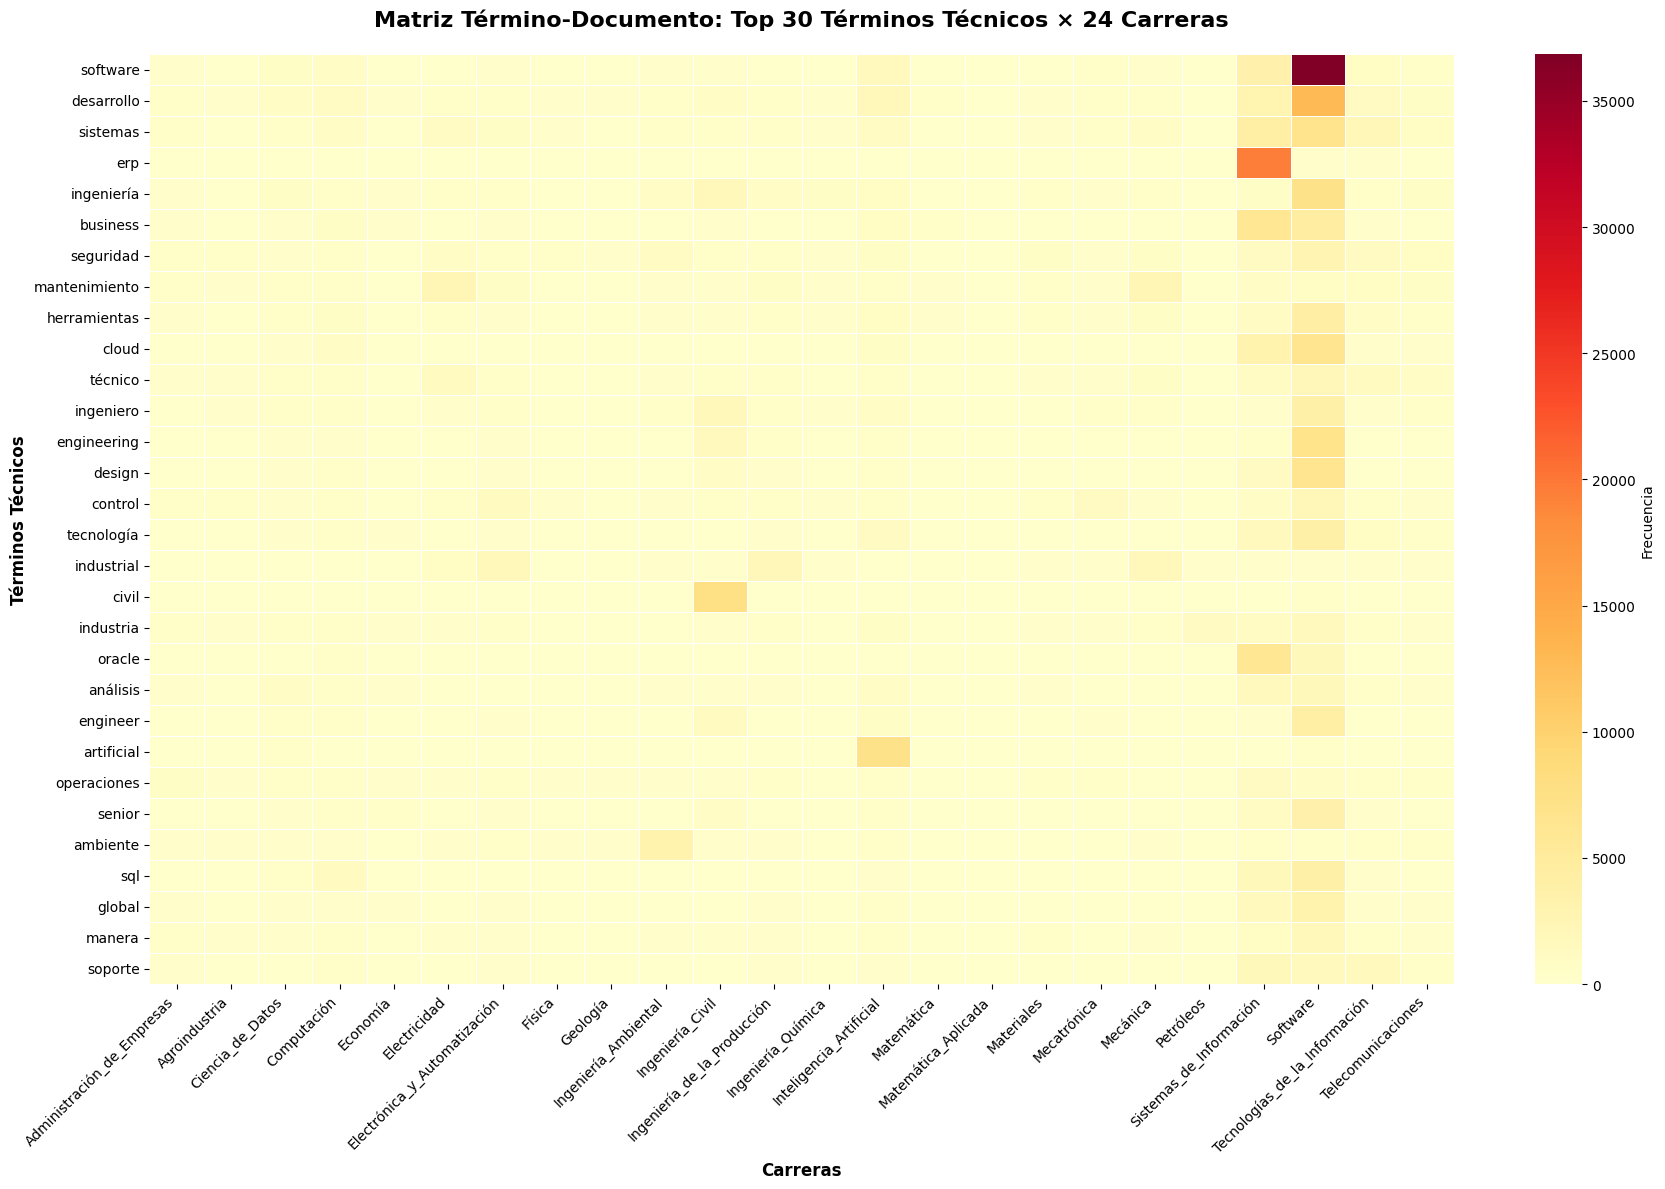

In [19]:
# Visualización: Heatmap de los top 30 términos más frecuentes
top_30_terminos = df_matriz_td.nlargest(30, 'Total').index
df_heatmap = df_viz.loc[top_30_terminos]

plt.figure(figsize=(18, 12))
sns.heatmap(df_heatmap, 
            cmap='YlOrRd', 
            annot=False,  # No mostrar valores (son muchos)
            fmt='d',
            cbar_kws={'label': 'Frecuencia'},
            linewidths=0.5,
            linecolor='white')

plt.title('Matriz Término-Documento: Top 30 Términos Técnicos × 24 Carreras', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Carreras', fontsize=12, fontweight='bold')
plt.ylabel('Términos Técnicos', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Matriz TF-IDF
Genera la matriz TF-IDF usando los Top 6 términos de cada carrera como vocabulario.

In [20]:
# Extraer los Top 6 términos de cada carrera para crear el vocabulario
top_6_por_carrera = {}
vocabulario_set = set()

for carrera, ranking in rankings_carreras.items():
    # Tomar solo los primeros 6 términos
    top_6 = [termino for termino, freq in ranking[:6]]
    top_6_por_carrera[carrera] = top_6
    # Agregar al vocabulario global
    vocabulario_set.update(top_6)

# Convertir a lista ordenada
vocabulario = sorted(list(vocabulario_set))

print(f"Vocabulario creado con {len(vocabulario)} términos únicos")
print(f"Términos por carrera: 6")
print(f"Total de carreras: {len(top_6_por_carrera)}")
print(f"\nPrimeros 20 términos del vocabulario: {vocabulario[:20]}")

Vocabulario creado con 89 términos únicos
Términos por carrera: 6
Total de carreras: 24

Primeros 20 términos del vocabulario: ['alimentos', 'ambiental', 'ambientales', 'ambiente', 'análisis', 'artificial', 'automatización', 'automático', 'business', 'básicas', 'centro', 'civil', 'cloud', 'construcción', 'consultant', 'consultor', 'control', 'controlador', 'cuisine', 'cultivos']


In [21]:
# Importar TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preparar los documentos (corpus limpio por carrera)
documentos = []
nombres_carreras = []

for carrera in sorted(corpus_carreras_limpio.keys()):
    documentos.append(corpus_carreras_limpio[carrera])
    nombres_carreras.append(carrera)

# Crear el vectorizador TF-IDF con el vocabulario de los Top 6
vectorizer = TfidfVectorizer(vocabulary=vocabulario)

# Ajustar y transformar los documentos
tfidf_matrix = vectorizer.fit_transform(documentos)

print(f"Matriz TF-IDF creada:")
print(f"  - Forma: {tfidf_matrix.shape} (documentos x términos)")
print(f"  - Documentos (carreras): {len(nombres_carreras)}")
print(f"  - Términos (vocabulario): {len(vocabulario)}")
print(f"  - Matriz dispersa: {tfidf_matrix.nnz} valores no ceros de {tfidf_matrix.shape[0] * tfidf_matrix.shape[1]} totales")

Matriz TF-IDF creada:
  - Forma: (24, 89) (documentos x términos)
  - Documentos (carreras): 24
  - Términos (vocabulario): 89
  - Matriz dispersa: 1958 valores no ceros de 2136 totales


In [22]:
# Convertir la matriz dispersa a DataFrame para mejor visualización
# Filas = Términos, Columnas = Documentos (Carreras)
df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray().T,  # Transponer para que términos sean filas
    index=vocabulario,
    columns=nombres_carreras
)

# Limpiar nombres de columnas (carreras)
df_tfidf.columns = [col.replace('_', ' ') for col in df_tfidf.columns]

print("=" * 100)
print("MATRIZ TF-IDF: Términos (filas) x Documentos/Carreras (columnas)")
print("=" * 100)
#print(f"\nForma de la matriz: {df_tfidf.shape}")
#print(f"\nPrimeras 10 filas y 5 columnas:")
#print(df_tfidf.iloc[:10, :5].round(4))
df_tfidf

MATRIZ TF-IDF: Términos (filas) x Documentos/Carreras (columnas)


,Administración de Empresas,Agroindustria,Ciencia de Datos,Computación,Economía,Electricidad,Electrónica y Automatización,Física,Geología,Ingeniería Ambiental,...,Matemática,Matemática Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas de Información,Software,Tecnologías de la Información,Telecomunicaciones
alimentos,0.161823,0.644029,0.073926,0.036305,0.071973,0.022300,0.066689,0.088111,0.186440,0.027978,...,0.000973,0.024974,0.035565,0.009791,0.027491,0.033626,0.010649,0.001102,0.054325,0.028444
ambiental,0.018486,0.033773,0.005170,0.005205,0.017947,0.008795,0.008790,0.010684,0.053531,0.298789,...,0.000000,0.002363,0.008258,0.006114,0.003444,0.023761,0.002417,0.000937,0.019307,0.005921
ambientales,0.015405,0.013950,0.001521,0.001735,0.006243,0.006108,0.006365,0.026711,0.035688,0.219748,...,0.000000,0.004726,0.012244,0.005095,0.010333,0.003211,0.001167,0.000866,0.003907,0.003471
ambiente,0.126301,0.110748,0.049674,0.033897,0.093714,0.062440,0.085619,0.130884,0.319306,0.753764,...,0.003058,0.020434,0.036385,0.011749,0.051164,0.017276,0.016253,0.011991,0.124551,0.064341
análisis,0.097686,0.027511,0.224116,0.095393,0.189678,0.012441,0.033782,0.062448,0.051432,0.059013,...,0.002572,0.037461,0.042678,0.043079,0.030291,0.012648,0.067534,0.041438,0.121459,0.056299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
soporte,0.103606,0.021867,0.028343,0.053902,0.062976,0.030750,0.049216,0.039351,0.038574,0.022806,...,0.000278,0.022704,0.020792,0.034757,0.024182,0.006170,0.073059,0.035297,0.352453,0.100239
sql,0.023596,0.000000,0.118009,0.331468,0.028884,0.000000,0.005416,0.009092,0.000000,0.006872,...,0.000923,0.019605,0.000000,0.020161,0.000000,0.000000,0.092006,0.118918,0.060730,0.003388
tecnología,0.070551,0.028216,0.069543,0.075759,0.133449,0.031455,0.075135,0.022242,0.047146,0.022806,...,0.000626,0.012487,0.016688,0.068045,0.031818,0.022520,0.066733,0.087983,0.221056,0.074542
telecomunicaciones,0.008881,0.001411,0.008474,0.004816,0.010496,0.007042,0.011358,0.004277,0.004286,0.006583,...,0.000417,0.005676,0.000821,0.008812,0.003055,0.009872,0.002522,0.003149,0.030254,0.267958


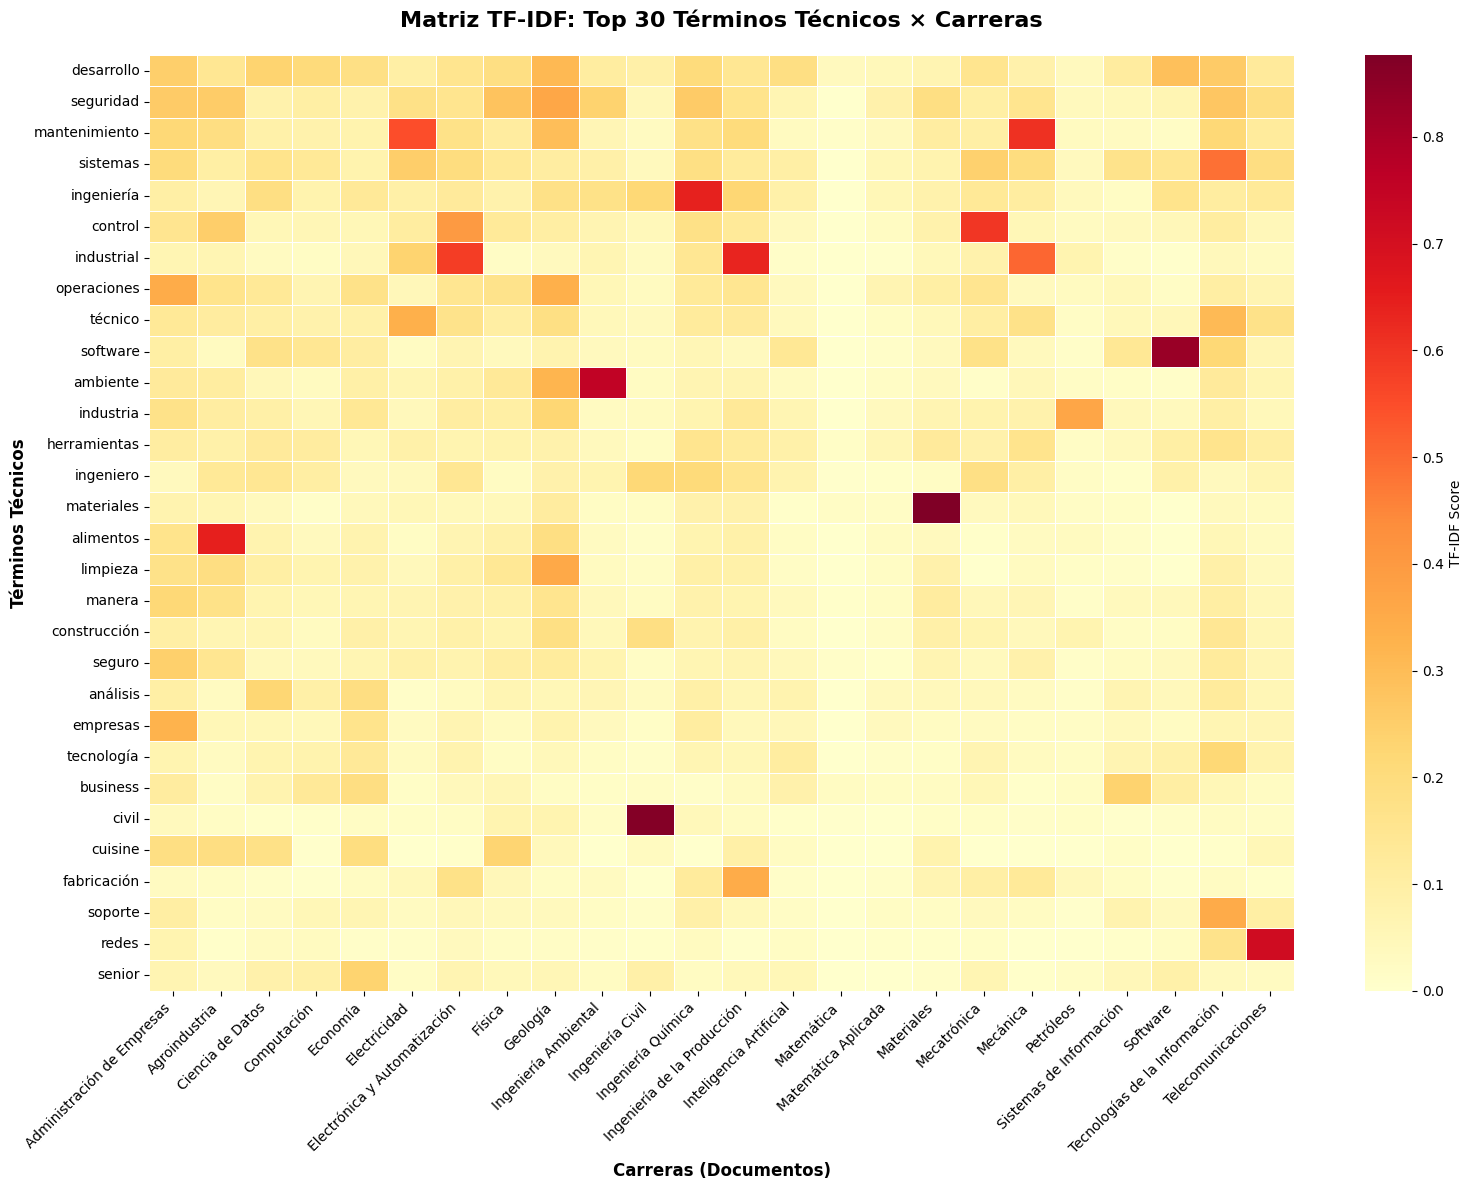

In [23]:
# Visualización: Heatmap de la matriz TF-IDF (muestra parcial)
# Seleccionar un subconjunto para mejor visualización

# Tomar los 30 términos más importantes globalmente (mayor suma de TF-IDF)
top_30_terms = df_tfidf.sum(axis=1).nlargest(30).index
df_tfidf_subset = df_tfidf.loc[top_30_terms]

# Crear heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_tfidf_subset, cmap='YlOrRd', annot=False, fmt='.3f', 
            cbar_kws={'label': 'TF-IDF Score'}, linewidths=0.5)
plt.title('Matriz TF-IDF: Top 30 Términos Técnicos × Carreras', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Carreras (Documentos)', fontsize=12, fontweight='bold')
plt.ylabel('Términos Técnicos', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()